
### Setup (10 minutes)

You will start working on Tasks 3-5 at 9.10am. Spend the 10 minutes for the setup to:

1. Replace CID in the file name with your CID, e.g. 123456_Coursework2_Part2.ipynb
2. Read and execute the following sections:

- **[S1](#s1). Package Imports** <a name="index-s1"></a>
- **[S2](#s2). Queries on Documentation** <a name="index-s2"></a>
- **[S3](#s3). Dataset Loading** <a name="index-s3"></a>



<a name="s1"></a>

## S1. Package Imports [(index)](#index-s1)

In [1]:
# Required imports - please stick to these imports only

import numpy as np
import matplotlib.pyplot as plt


# Initial global plotting configuration
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<a name="s2"></a>

## S2. Queries on Documentation [(index)](#index-s2)

Documentation of common Python libraries (*e.g.*, np.linalg.eig) can be accessed locally quicker than using the Web by executing the following expression in an arbitrary cell.

```python
?np.linalg.eig # this will display the documentation. Press [x] button to close the documentation dialogue.
```

In [2]:
# Example: uncomment the line below (CTRL+/) and execute (SHIFT+Enter)
# to get the documentation of `np.linalg.eig` function for Eigen decomposition.
# Press the [x] button to close the documentation dialogue.

?np.linalg.eig

Signature: np.linalg.eig(a)
Docstring:
Compute the eigenvalues and right eigenvectors of a square array.

Parameters
----------
a : (..., M, M) array
    Matrices for which the eigenvalues and right eigenvectors will
    be computed

Returns
-------
w : (..., M) array
    The eigenvalues, each repeated according to its multiplicity.
    The eigenvalues are not necessarily ordered. The resulting
    array will be of complex type, unless the imaginary part is
    zero in which case it will be cast to a real type. When `a`
    is real the resulting eigenvalues will be real (0 imaginary
    part) or occur in conjugate pairs

v : (..., M, M) array
    The normalized (unit "length") eigenvectors, such that the
    column ``v[:,i]`` is the eigenvector corresponding to the
    eigenvalue ``w[i]``.

Raises
------
LinAlgError
    If the eigenvalue computation does not converge.

See Also
--------
eigvals : eigenvalues of a non-symmetric array.
eigh : eigenvalues and eigenvectors of a real symmet

<a name="s3"></a>

## S3. Dataset Loading [(index)](#index-s3)

#### Dataset (just for reference, same as in Part 1)
> In this coursework, you will work with a dataset of images of stars measured with the Euclid telescope of the European Space Agency. The training dataset comprises 648 images of stars (32 x 32 pixels) and the test set includes 32 images of stars (32 x 32 pixels). The stars in the dataset belong to four stellar classes: O5V, A0V, F5V and M5V. The first letter in the code denotes the spectral type (from hottest to coolest: O, B, A, F, G, K, M); the second digit represents the spectral subtype (from hottest to coolest: 1-9); the third letter V indicates that all the stars in our dataset are dwarf stars.

> The high-quality embeddings are 180-dimensional vectors, one for each star image, that were computed using a deep neural network able to classify images into the 4 classes with high accuracy.

####  In the next cell, the dataset is loaded for you into the following arrays:

- `star_images_train`: `(N, 32, 32)` array containing `N`=648 images of size of 32x32 each, to use for training.
- `star_embeddings_train`: `(N, p)` array containing `N`=648 embeddings (each with `p`=180 dimensions), one for each training sample in `star_images_train`.
- `star_classes_train`: `(N,)` array containing `N`=648 integer labels (the star image class, with number of classes `n_classes` = 4), one label for each training sample.


- `star_images_test`: `(N, 32, 32)` array containing `N`=32 images of size of 32x32 each, to use for testing.
- `star_embeddings_test`: `(N, p)` array, containing `N`=32 embeddings (each with `p`=180 dimensions), one for each test sample in `star_images_test`.
- `star_classes_test`: `(N,)` array containing `N`=32 class labels, one for each test sample.

In [3]:
def load_data(path):
    BASE_URL = "https://github.com/barahona-research-group/mfds-resources/raw/main/datasets/cw2/data"
    return np.load(np.DataSource().open(f"{BASE_URL}/{path}.npy").name)

star_images_train = load_data("training/star_images_train")
star_embeddings_train = load_data("training/star_embeddings_train")
star_classes_train = load_data("training/star_classes_train")

star_images_test = load_data("test/star_images_test")
star_embeddings_test = load_data("test/star_embeddings_test")
star_classes_test = load_data("test/star_classes_test")



## Coursework 2 Part 2 (90 minutes)

###  Tasks Outline

- [Task 3](#task-3): k-means clustering (20 marks) <a name="index-task-3"></a>
  - [(3.1)](#task-31) <a name="index-task-31"></a>
  - [(3.2)](#task-32) <a name="index-task-32"></a>
  - [(3.3)](#task-33) <a name="index-task-33"></a>
- [Task 4](#task-4): Gaussian Naive Bayes Classifier (15 marks) <a name="index-task-4"></a>
  - [(4.1)](#task-41) <a name="index-task-41"></a>
  - [(4.2)](#task-42) (3rd-year students only)  <a name="index-task-42"></a>
  - [(4.2)](#task-42m)  (MSc/4th-year students only) <a name="index-task-42m"></a>
- [Task 5](#task-5): Soft-margin linear SVM classifier (15 marks) <a name="index-task-5"></a>
  - [(5.1)](#task-51) <a name="index-task-51"></a>
  - [(5.2)](#task-52) (3rd-year students only) <a name="index-task-52"></a>
  - [(5.2)](#task-52m) (MSc/4th-year students only) <a name="index-task-52m"></a>

If you have troubles visualising the text and the images describing the tasks, you can download a PDF with the tasks' description at this [link](https://drive.google.com/file/d/1RZd_9NssPKGHNr0WxEVm0o97to6ETq1D/view?usp=sharing).

Recommendation: if there are tasks where you get stuck, try to carry on as much as you can with the following tasks.

<a name="task-3"></a>

## Task 3:   k-means clustering (15 marks) [(index)](#index-task-3)


<a name="task-31"></a>

### **3.1 (8 marks)**   [(index)](#index-task-31)


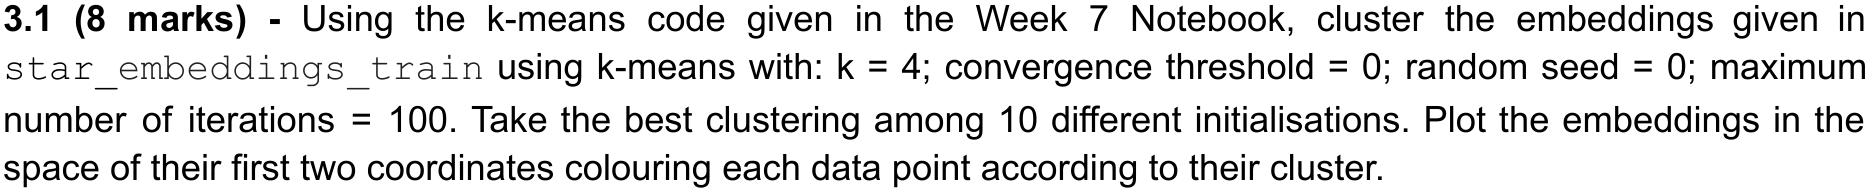

In [4]:
# EDIT THIS FUNCTION
def compute_within_distance(centroids, X, labels):
    """
    Compute the within-cluster distance.

    Args:
        centroids (np.ndarray): the centroids array, with shape (k, p).
        X (np.ndarray): the samples array, with shape (N, p).
        labels (np.ndarray): the cluster index of each sample, with shape (N,).

    Retruns:
        (float): the within-cluster distance.
    """
    within_distance = 0.0
    k, p = centroids.shape

    for l in range(len(centroids)):
        centroid = centroids[l]
        # Applying aggregate computations on `NaN` values
        # can propagate the `NaN` to the results.
        # In this case we skip the `NaN` centroid,
        # which is effectively of an empty cluster.
        if np.isnan(centroid).any():
            continue

        # Select samples belonging to label=l.
        X_cluster = X[labels == l]

        # EDIT THE NEXT LINES
        # You need to add the `X_cluster` contribution to `within_distance`

        # 1. Compute the cluster contribution.
        cluster_se = (X_cluster - centroid)**2 # <-- SOLUTION
        assert cluster_se.shape == (len(X_cluster), p) # <-- SOLUTION
        # 2. Accumulate
        within_distance += np.sum(cluster_se) # <-- SOLUTION

    return within_distance


In [5]:
# EDIT THIS FUNCTION
def compute_centroids(k, X, labels):
    """
    Compute the centroids of the clustered points X.

    Args:
        k (int): total number of clusters.
        X (np.ndarray): data points, with shape (N, p)
        labels (np.ndarray): cluster assignments for each sample in X, with shape (N,).

    Returns:
        (np.ndarray): the centroids of the k clusters, with shape (k, p).
    """
    N, p = X.shape

    centroids = np.zeros((k, p))

    # EDIT THE NEXT LINES
    for label in range(k):
        cluster_X_l = X[labels == label] # <-- SOLUTION
        centroids[label] = cluster_X_l.mean(axis=0) # <-- SOLUTION

    return centroids


In [6]:
# EDIT THIS FUNCTION
def kmeans_assignments(centroids, X):
    """
    Assign every example to the index of the closest centroid.

    Args:
        centroids (np.ndarray): The centroids of the k clusters, shape: (k, p).
        X (np.ndarray): The samples array, shape (N, p).

    Returns:
        (np.ndarray): an assignment matrix to k clusters, by their indices.
    """
    k, p = centroids.shape
    N, _ = X.shape

    # Compute distances between data points and centroids. Assumed shape: (k, N).
    distances = np.vstack([np.linalg.norm(X - c, axis=1) for c in centroids]) # <-- SOLUTION
    # Note: If any centroid has NaN, the NaN value will propagate into the
    # distance corresponding row, we need to skip that row next when we search
    # for the closest centroid.

    assert distances.shape == (k, N), f"Unexpected shape {distances.shape} != {(k, N)}"
    # Assignments are computed by finding the centroid with the minimum distance
    # for each sample. The np.nanargmin returns the index of the minimum values
    # in `distances` scanning the rows (axis=0) for each column,
    # while skipping any nan value found.
    return np.nanargmin(distances, axis=0)



In [7]:
# EDIT THIS FUNCTION
def kmeans_clustering(X, k,
                      max_iters=1000,
                      epsilon=0.0,
                      callback=None):
    """
    Apply k-means clustering algorithm on the samples in `X` to generate
    k clusters.

    Notes:
      The main steps followed here are described previously:
        1. randomly assignments of the points to $k$-clusters.
        2. compute the centroid of each of the $k$- clusters.
        3. reassign each point to the closest centroid.
        4. repeat steps (2) and (3) until:
            - assignments/labels do not change, or
            - the within-distance $W(C)$ converges with `epsilon` tolerence.
            - or the number of iterations exceeds `max_iters`.


    Args:
        X (np.ndarray): The samples array, shape: (N, p).
        k (int): The number of clusters.
        max_iters (int): Maximum number of iterations.
        epsilon (float): The minimum change in the within-distance to continue.
        callback (Callable): a function to be called on the assignments,
            the centroids, and within-distance after each iteration, default is None.

    Returns:
        Tuple[np.ndarray, np.ndarray]: the assignments array to k clusters with
            shape (N,) and the centroids array
    """
    # Step 1: randomly initialise the cluster assignments.
    labels = np.random.choice(k, size=len(X), replace=True) # <-- SOLUTION

    within_distance = np.inf

    for _ in range(max_iters):
        # Step 2: compute the centroids
        centroids = compute_centroids(k, X, labels) # <-- SOLUTION

        if callback:
            callback(labels, centroids)

        # Step 3: reassignments.
        new_labels = kmeans_assignments(centroids, X) # <-- SOLUTION

        _within_distance = compute_within_distance(centroids, X, labels)

        # Step 4: repeat (2) and (3) until a termination condition.
        if all(labels == new_labels) or abs(_within_distance - within_distance) < epsilon: # <-- SOLUTION
            break

        labels = new_labels
        within_distance = _within_distance


    return labels, centroids, within_distance


In [8]:
# EDIT THIS FUNCTION
def kmeans_clustering_multi_runs(X, k, max_iters=100,
                                 epsilon=0.0,
                                 n_runs=100, seed=0):
    """
    Perform multiple runs (with different initialisations) of kmeans algorithm
    and return the best clustering using the within-cluster distance.

    Args:
        X (np.ndarray): The samples array, shape (N, p).
        k (int): The number of clusters.
        max_iters (int): Maximum iterations of kmeans algorithm.
        epsilon (float): The convergence threshold of kmeans algorithm.
        n_runs (int): The number of runs of kmeans with different initialisations.
        seed (int): A seed value before starting the n_runs loop.

    Returns:
        Tuple[np.ndarray, ...]: A tuple that encapsulates (labels, centroids,
        intermediate clustering, within-cluster distance) of the best clusetering
        that minimises the within-cluster distance along the n_runs.
    """
    # We fix the seed once before starting the n_runs.
    np.random.seed(seed)
    min_within_distance = np.inf
    best_clustering = (None, None, None)

    for _ in range(n_runs):
        intermediates = []
        # Our callback stores all the intermediate labels and centroids
        # in case we need them for debugging and visualisations.
        callback = lambda labels, centroids: intermediates.append((labels, centroids))

        labels, centroids, wd = kmeans_clustering(X, k=k, max_iters=max_iters,
                                                    epsilon=epsilon,
                                                    callback=callback) # <-- SOLUTION

        if wd < min_within_distance:
            best_clustering = labels, centroids, intermediates
            min_within_distance = wd

    labels, centroids, intermediates = best_clustering
    return labels, centroids, intermediates, wd

In [10]:
labels, centroids, intermediates, wd = kmeans_clustering_multi_runs(star_embeddings_train, k=4, max_iters=100, epsilon=0.0, n_runs=10, seed=0)


In [11]:
print(labels.shape)

(648,)


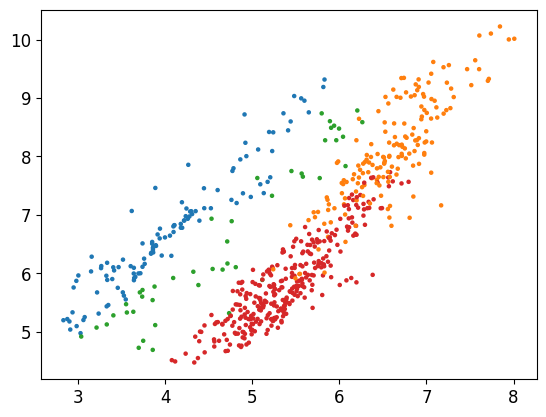

In [194]:
import matplotlib

cmap = matplotlib.colormaps.get_cmap('tab10')
color_type = [cmap(i) for i in labels]

# Transform node/class values to class names
value_to_type = {0 : "O5V", 1: "A0V", 2 : "F5V", 3 : "M5V"}

# scatter plot
plt.scatter(star_embeddings_train[:, 0], star_embeddings_train[:, 1], c=color_type, s=5)



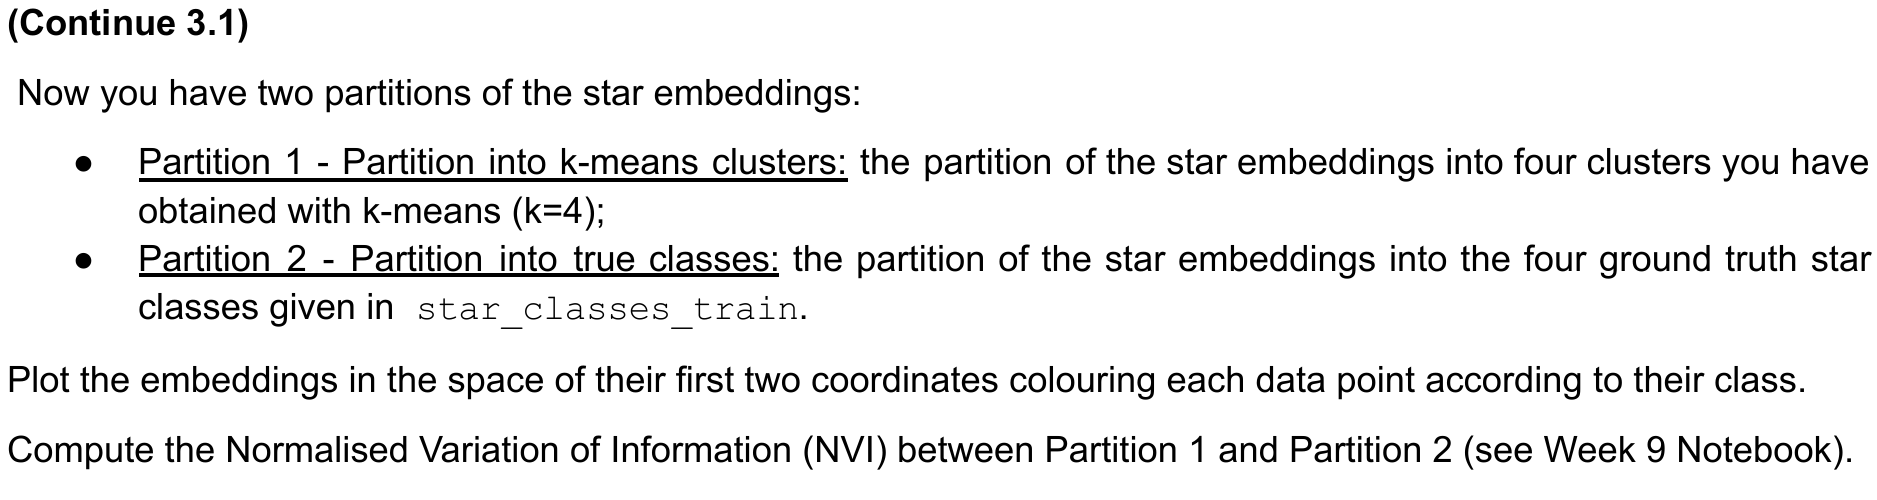

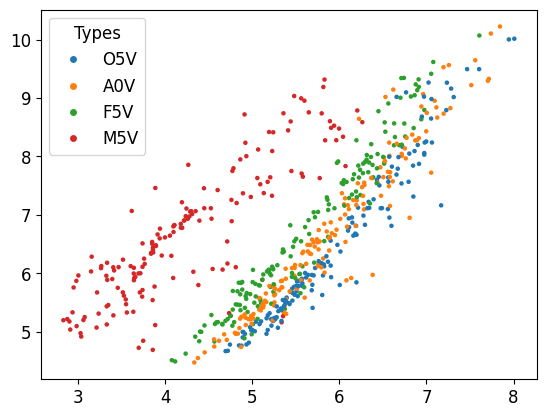

In [18]:
cmap = matplotlib.colormaps.get_cmap('tab10')
color_type = [cmap(i) for i in star_classes_train]

# scatter plot
plt.scatter(star_embeddings_train[:, 0], star_embeddings_train[:, 1], c=color_type, s=5)

# create legend for node types
types_legend = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=cmap(value)) for value, label in value_to_type.items()]
plt.legend(handles=types_legend, title='Types')


<a name="task-32"></a>

### **3.2 (7 marks)**   [(index)](#index-task-32)


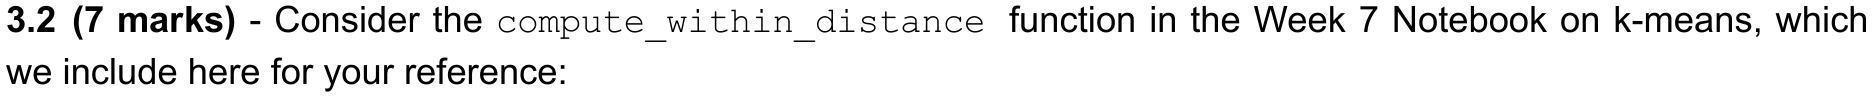

In [ ]:
def compute_within_distance(centroids, X, labels):
    """
    Compute the within-cluster distance.

    Args:
        centroids (np.ndarray): the centroids array, with shape (k, p).
        X (np.ndarray): the samples array, with shape (N, p).
        labels (np.ndarray): the cluster index of each sample, with shape (N,).

    Returns:
        (float): the within-cluster distance.
    """
    within_distance = 0.0
    k, p = centroids.shape

    for l in range(len(centroids)):
        centroid = centroids[l]
        # Applying aggregate computations on `NaN` values
        # can propagate the `NaN` to the results.
        # In this case we skip the `NaN` centroid,
        # which is effectively of an empty cluster.
        if np.isnan(centroid).any():
            continue

        # Select samples belonging to label=l.
        X_cluster = X[labels == l]

        # You need to add the `X_cluster` contribution to `within_distance`

        # 1. Compute the cluster contribution.
        cluster_se = (X_cluster - centroid)**2
        assert cluster_se.shape == (len(X_cluster), p)
        # 2. Accumulate
        within_distance += np.sum(cluster_se)

    return within_distance

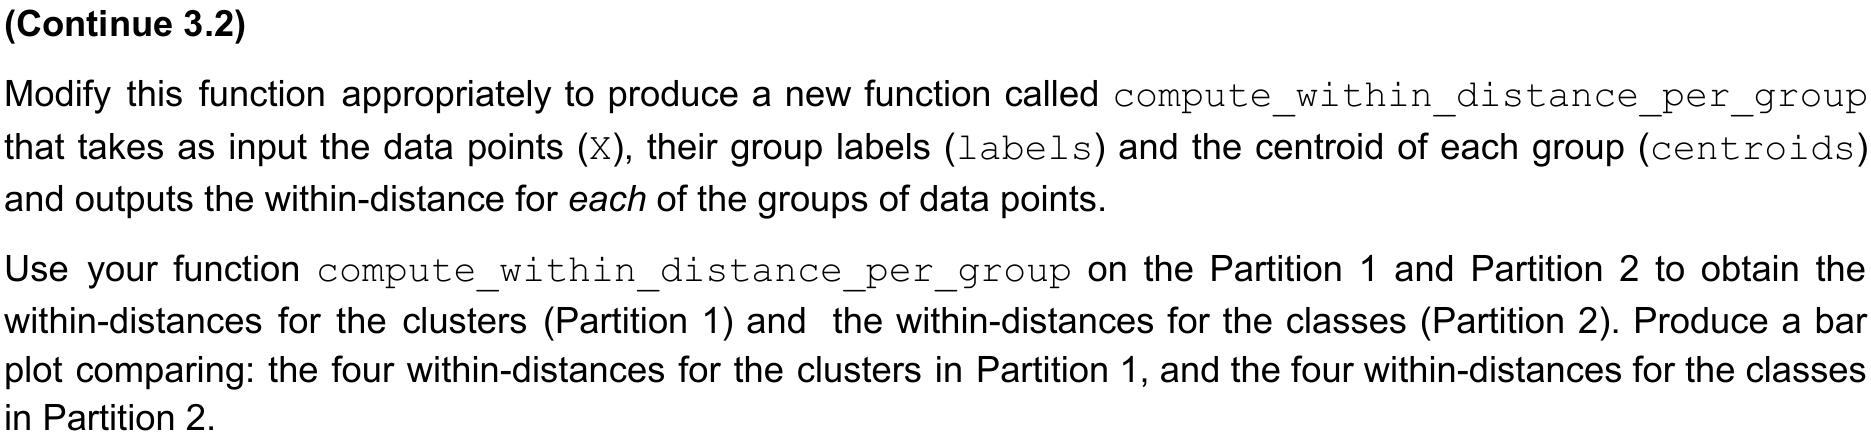

In [19]:
def compute_within_distance_per_group(centroids, X, labels):
    """
    Compute the within-cluster distance.

    Args:
        centroids (np.ndarray): the centroids array, with shape (k, p).
        X (np.ndarray): the samples array, with shape (N, p).
        labels (np.ndarray): the cluster index of each sample, with shape (N,).

    Returns:
        (float): the within-cluster distance.
    """
    within_distances = np.zeros(len(centroids))
    k, p = centroids.shape

    for l in range(len(centroids)):
        centroid = centroids[l]
        # Applying aggregate computations on `NaN` values
        # can propagate the `NaN` to the results.
        # In this case we skip the `NaN` centroid,
        # which is effectively of an empty cluster.
        if np.isnan(centroid).any():
            continue

        # Select samples belonging to label=l.
        X_cluster = X[labels == l]

        # You need to add the `X_cluster` contribution to `within_distance`

        # 1. Compute the cluster contribution.
        cluster_se = (X_cluster - centroid)**2
        assert cluster_se.shape == (len(X_cluster), p)
        # 2. Accumulate
        within_distances[l] = np.sum(cluster_se)

    return within_distances

In [23]:
wd1 = compute_within_distance_per_group(centroids, star_embeddings_train, labels)

centroids2 = compute_centroids(4, star_embeddings_train, star_classes_train)
wd2 = compute_within_distance_per_group(centroids, star_embeddings_train, star_classes_train)

In [24]:
wd1

array([13068.03719183, 29057.84819963,  8046.22051677, 34527.27878372])

In [25]:
wd2

array([516180.64755114,  68457.83274657, 143855.58962054, 397657.82889003])

<BarContainer object of 4 artists>

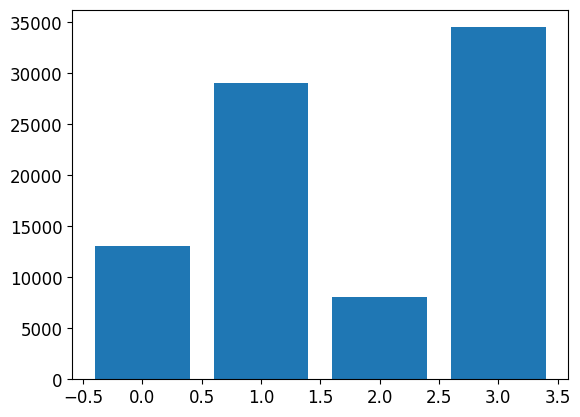

In [27]:
plt.bar(range(4), wd1)

<BarContainer object of 4 artists>

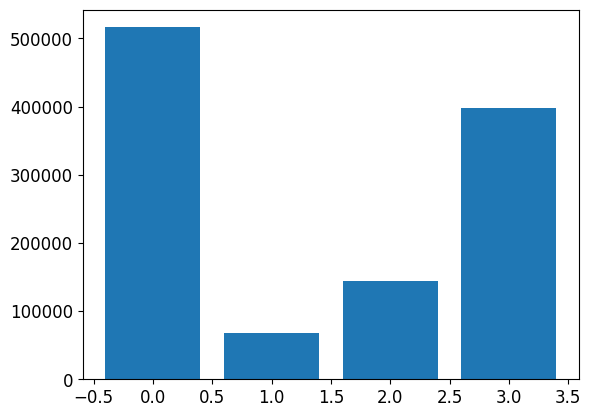

In [30]:
plt.bar(range(4), wd2)

<a name="task-33"></a>

### **3.3 (5 marks)**   [(index)](#index-task-33)

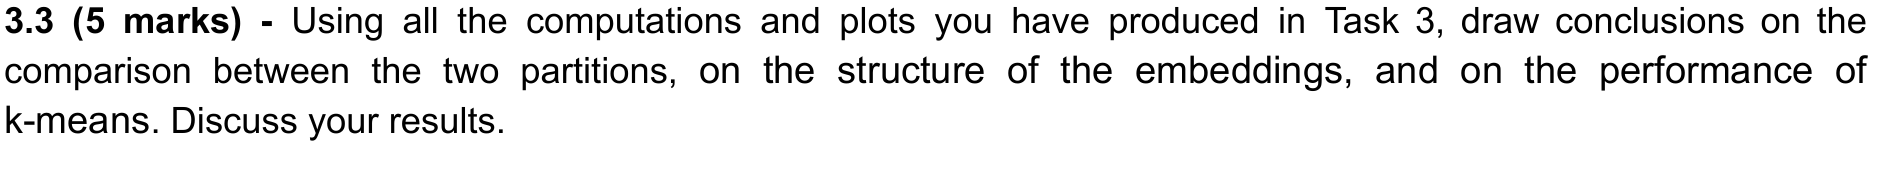

We observe k  means partitions the M5V class quite well, but the others not so much as they are much more intertwined and close together. We see the within distance for the 3rd cluster is quite similar for both, but for other clusters it varies a lot. 



---



<a name="task-4"></a>

## Task 4:  Gaussian Naive Bayes classifier (15 marks) [(index)](#index-task-4)

<a name="task-41"></a>

### **4.1 (10 marks)**   [(index)](#index-task-41)


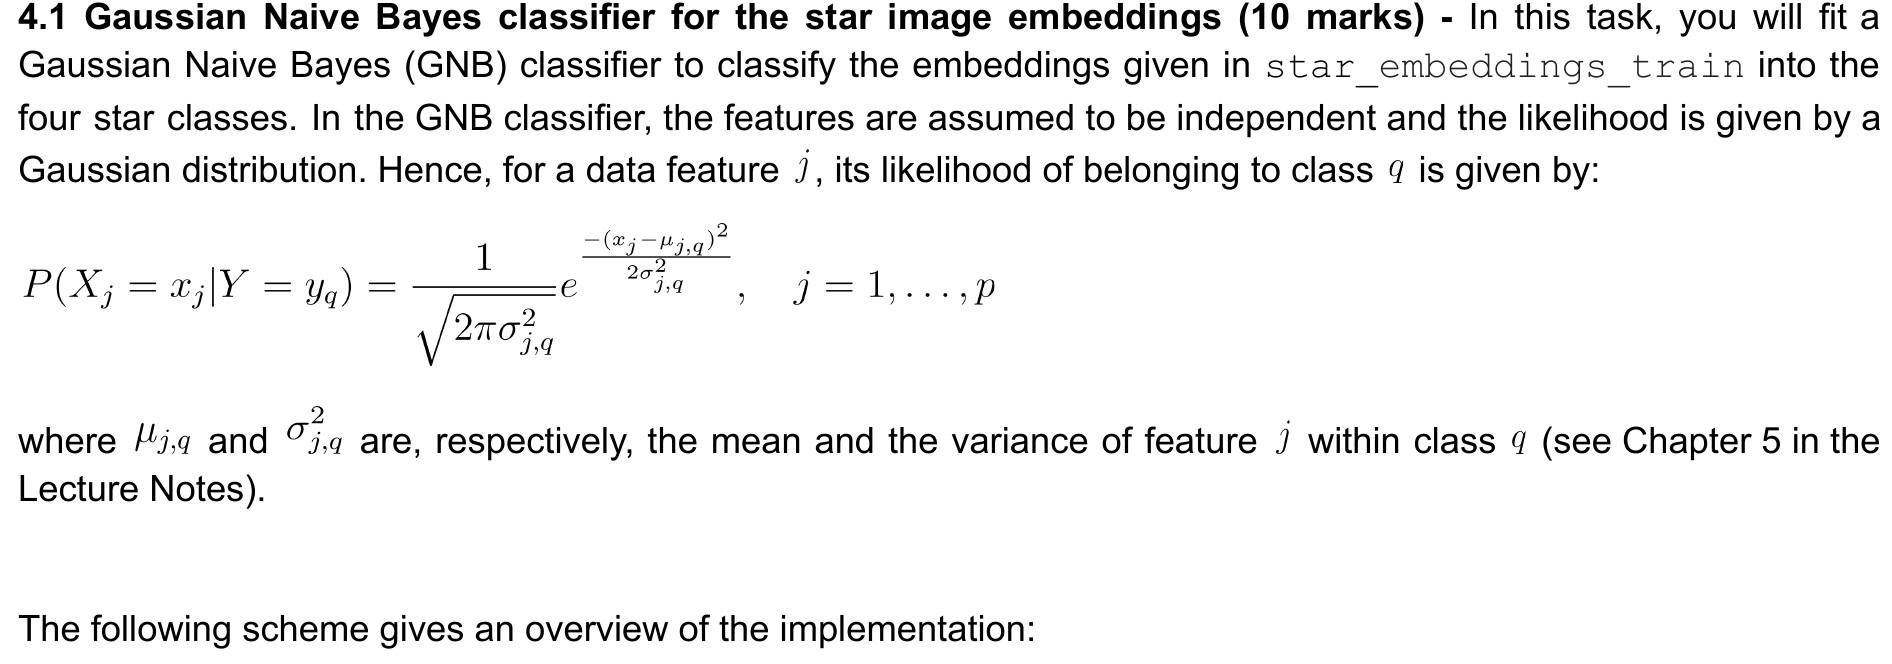

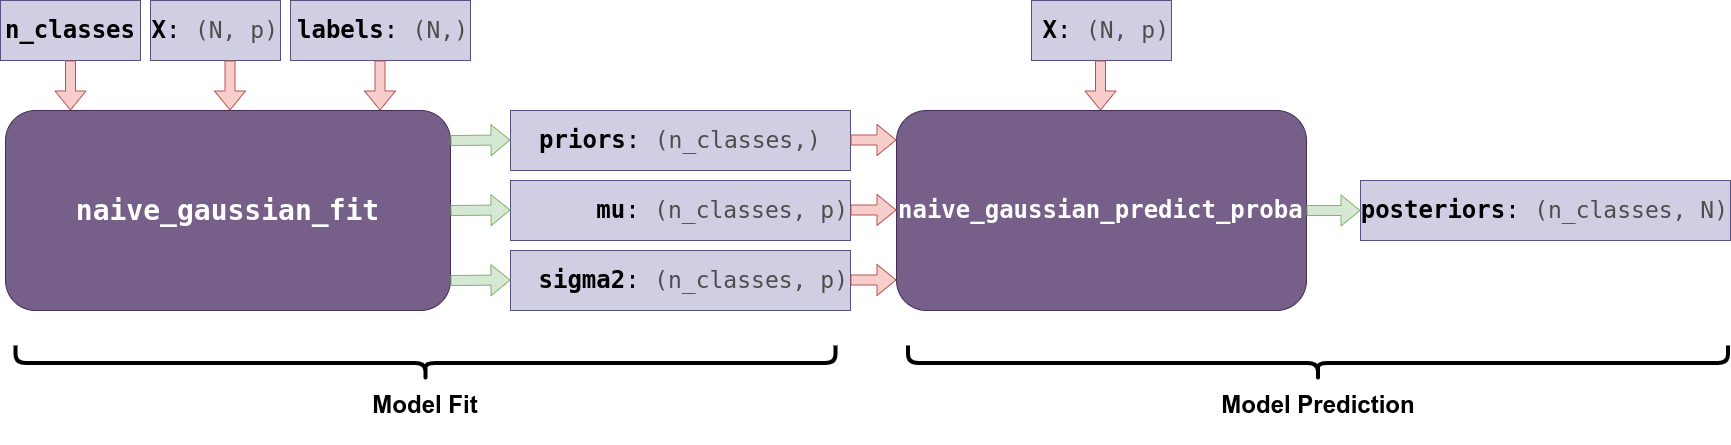

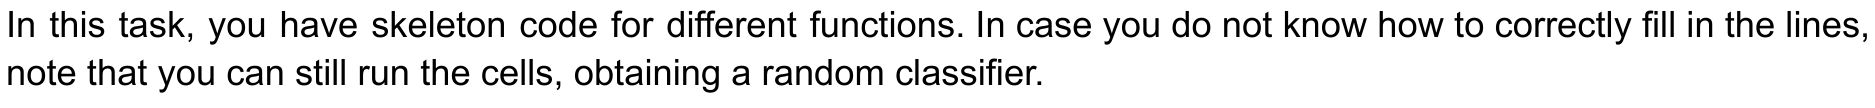


#### **4.1.1 (3 marks)**

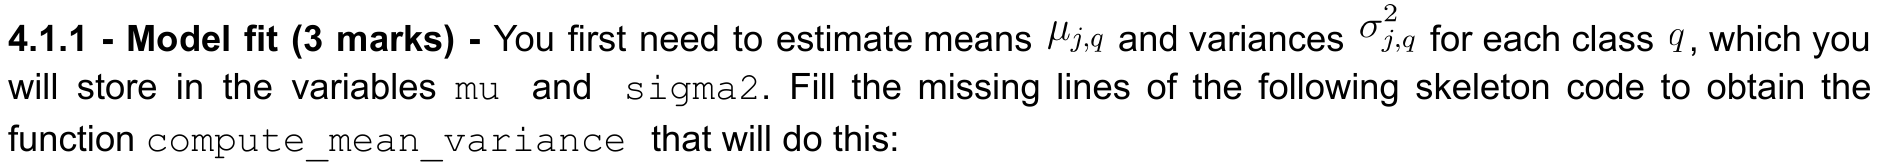

In [31]:
# EDIT THIS FUNCTION.
def compute_mean_variance(n_classes, X, labels):
    """
    Compute the mean and the variance of samples with respect to each class.

    Args:
        n_classes (int): total number of classes.
        X (np.ndarray): data points, with shape (N, p)
        labels (np.ndarray): class labels for each sample in X, with shape (N,),
            while each label value belongs to {0, 1, ..., n_classes - 1}.

    Returns:
        mu: the mean of the classes, with shape (n_classes, p).
        sigma2: the variance of the classes, with shape (n_classes, p).

    """
    N, p = X.shape

    mu = np.zeros((n_classes, p))
    sigma2 = np.ones((n_classes, p))

    for label in range(n_classes):
        X_c = X[labels==label] # <-- EDIT THIS LINE
        mu[label] = np.mean(X_c) # <-- EDIT THIS LINE
        sigma2[label] = np.var(X_c) # <-- EDIT THIS LINE

    return mu, sigma2

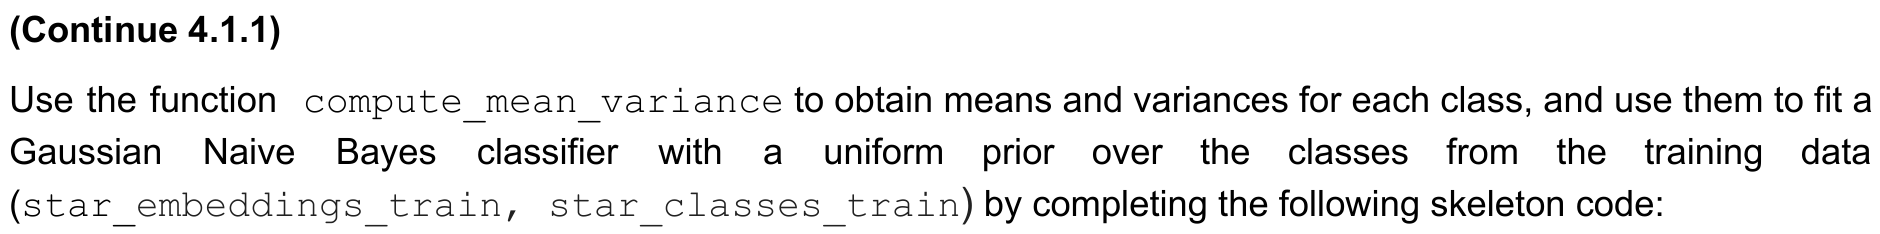

In [66]:
# EDIT THIS FUNCTION
def naive_gaussian_fit(n_classes, X, y):
    """Use training data to fit the Gaussian Naive Bayes classifier parameters.

    Args:
        n_classes (int): total number of classes.
        X (np.array): The samples array, shape: (N, p).
        y (np.array): Categorical target array, shape: (N, ). Each category value
            belongs to {0, 1, ..., n_classes - 1}.

    Returns:
        prior (np.array): Prior distribution of classes, shape: (n_classes, ).
        mu (np.ndarray): the mean for each class, shape: (n_classes, p)
        sigma2 (np.ndarray): the variance for each class, shape: (n_classes, p)
    """
    p = X.shape[1]

    # define prior
    # prior = np.zeros(n_classes) + 1e-2 # <-- EDIT THIS LINE
    prior = np.full(4, 1/4) # <-- EDIT THIS LINE

    mu, sigma2 = compute_mean_variance(n_classes, X, y)

    return prior, mu, sigma2


In [67]:
prior, mu, sigma2 = naive_gaussian_fit(4, star_embeddings_train, star_classes_train)

In [68]:
prior

array([0.25, 0.25, 0.25, 0.25])

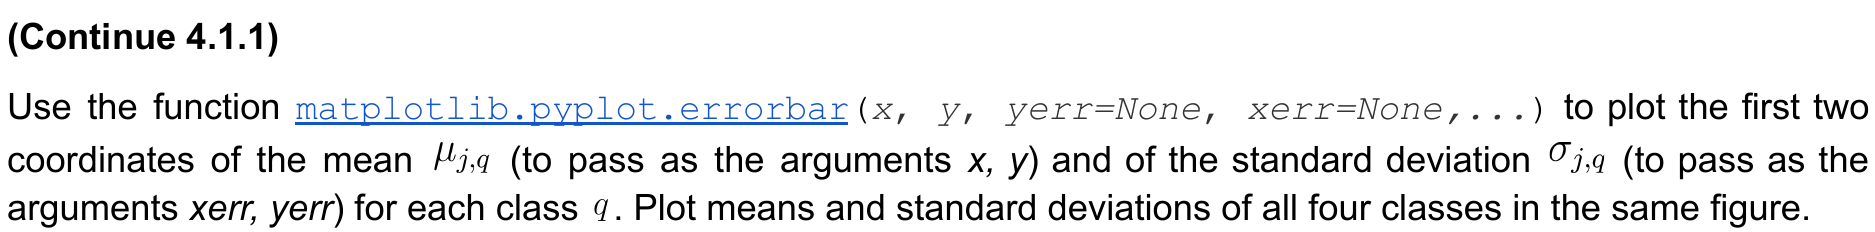

In [69]:
# uncomment the line below (CTRL+/) and execute (SHIFT+Enter) to get the documentation
?plt.errorbar

Signature:
plt.errorbar(
    x,
    y,
    yerr=None,
    xerr=None,
    fmt='',
    ecolor=None,
    elinewidth=None,
    capsize=None,
    barsabove=False,
    lolims=False,
    uplims=False,
    xlolims=False,
    xuplims=False,
    errorevery=1,
    capthick=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot y versus x as lines and/or markers with attached errorbars.

*x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
sizes. By default, this draws the data markers/lines as well the
errorbars. Use fmt='none' to draw errorbars without any data markers.

Parameters
----------
x, y : float or array-like
    The data positions.

xerr, yerr : float or array-like, shape(N,) or shape(2, N), optional
    The errorbar sizes:

    - scalar: Symmetric +/- values for all data points.
    - shape(N,): Symmetric +/-values for each data point.
    - shape(2, N): Separate - and + values for each bar. First row
      contains the lower errors, the second row contains the

In [71]:
print(mu[:, 0])

[5.62534428 5.5952692  5.58431005 5.61438799]


<ErrorbarContainer object of 3 artists>

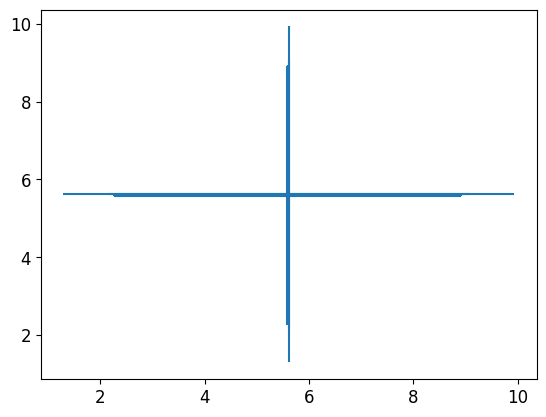

In [56]:
plt.errorbar(mu[:, 0], mu[:, 1], xerr = np.sqrt(sigma2[:,0]), yerr = np.sqrt(sigma2[:,1]))

#### **4.1.2 (7 marks)**

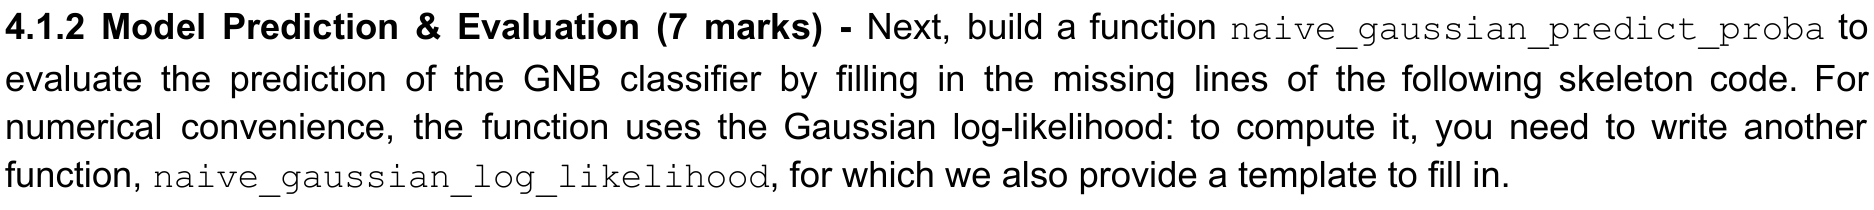

In [217]:

# # EDIT THIS FUNCTION
# def naive_gaussian_log_likelihood(X, mu_i, sigma2_i):
#     """
#     Compute the Gaussian log-likelihood for each multi-dimensional sample in X,
#     with the naive assumption of independence across features (dimensions).

#     Args:
#         X (np.ndarray): the data array, shape: (N, p).
#         mu_i (np.ndarray): the class mean, shape: (p, )
#         sigma2_i (np.ndarray): the class variance, shape: (p, )

#     Returns:
#         (np.ndarray): the log-likelihood for each sample, shape: (N, ).
    
#     """
#     print((X-mu_i[:, None]).shape)
    
#     logl = -np.log(2*np.pi*sigma2_i)/2 - (1/(2*sigma2_i)) * np.sum((X-mu_i)**2)

#     return logl # <-- EDIT THIS LINE

def naive_gaussian_log_likelihood(X, mu_i, sigma2_i):
    """
    Compute the Gaussian log-likelihood for each multi-dimensional sample in X,
    with the naive assumption of independence across features (dimensions).

    Args:
        X (np.ndarray): the data array, shape: (N, p).
        mu_i (np.ndarray): the class mean, shape: (p, )
        sigma2_i (np.ndarray): the class variance, shape: (p, )

    Returns:
        (np.ndarray): the log-likelihood for each sample, shape: (N, ).
    
    """
    N = X.shape[0]
    p = X.shape[1]
    logl = np.zeros((N, p))
    for k in range(N):
        for j in range(p):
            logl[k, j] = -np.log(2*np.pi*sigma2_i[j])/2 - (1/(2*sigma2_i[j])) * (X[k, j]-mu_i[j])**2
    logl = np.prod(logl, axis=1)
    
    return logl # <-- EDIT THIS LINE


# EDIT THIS FUNCTION
def naive_gaussian_predict_proba(prior, mu, sigma2, X):
    """Predict the posterior probabilities of the classes with the Gaussian Naive Bayes.

    Args:
        prior (np.array): Prior distribution of classes, shape: (n_classes, ).
        mu (np.ndarray): the mean for each class, shape: (n_classes, p)
        sigma2 (np.ndarray): the variance for each class, shape: (n_classes, p)
        X (np.array): The samples array, shape: (N, p).


    Returns:
        posteriors (np.array): Posterior distribution of samples, shape: (n_classes, N).
    """
    n_classes, N = len(prior), len(X)

    # define likelihood P(x|y) shape: (n_classes, N)
    log_lk = np.vstack([naive_gaussian_log_likelihood(X, mu_i, sigma2_i) for (mu_i, sigma2_i) in zip(mu, sigma2)])

    # compute log-posterior
    log_posterior = log_lk + np.log(prior)[:, None] # <-- EDIT THIS LINE

    # to ensure numerical stability when computing the normalisation factor, we can subtract the maximum log posterior
    # this change will be re-absorbed into the normalisation factor without loss of generality
    log_posterior = log_posterior - log_posterior.max(axis=0)

    # normalize to get full posterior distribution
    # normalize_term = np.ones((1, N)) # <-- EDIT THIS LINE
    # posteriors = np.ones((n_classes, N)) / n_classes # <-- EDIT THIS LINE
    normalize_term = np.exp(log_posterior).sum(axis=1).reshape(-1, 1) # <-- EDIT THIS LINE
    posteriors = np.exp(log_posterior)/normalize_term # <-- EDIT THIS LINE

    return posteriors

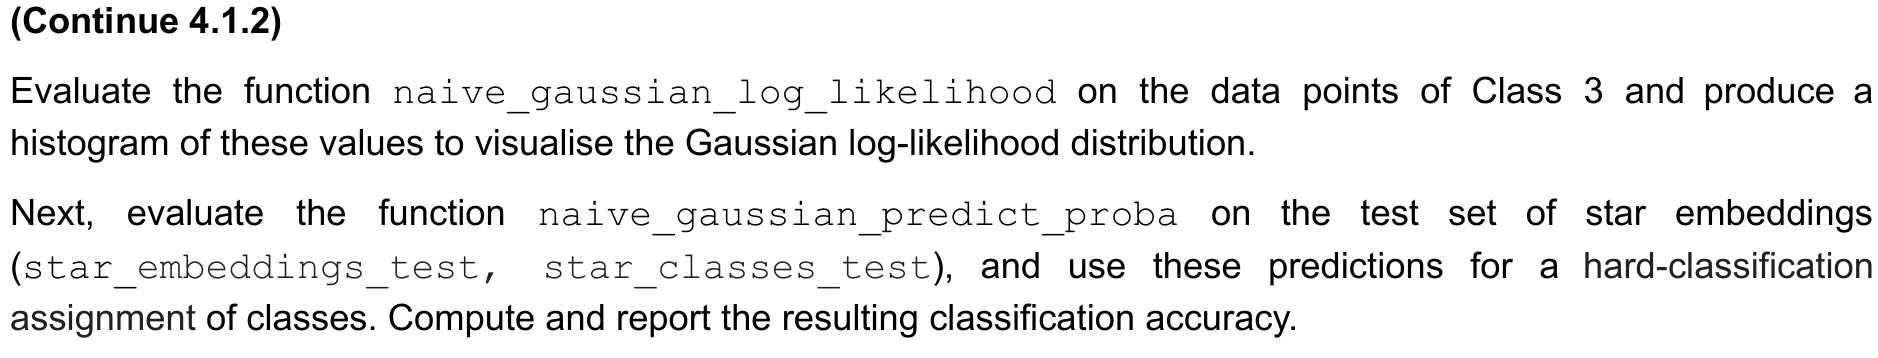

In [218]:
ng_log_lk = np.vstack([naive_gaussian_log_likelihood(star_embeddings_train, mu_i, sigma2_i) for (mu_i, sigma2_i) in zip(mu, sigma2)])

In [219]:
ng_log_lk.shape

(4, 648)

(array([[4., 0., 0., ..., 0., 0., 0.],
        [4., 0., 0., ..., 0., 0., 0.],
        [4., 0., 0., ..., 0., 0., 0.],
        ...,
        [4., 0., 0., ..., 0., 0., 0.],
        [4., 0., 0., ..., 0., 0., 0.],
        [4., 0., 0., ..., 0., 0., 0.]]),
 array([1.71668857e+64, 4.71890002e+86, 9.43780004e+86, 1.41567001e+87,
        1.88756001e+87, 2.35945001e+87, 2.83134001e+87, 3.30323001e+87,
        3.77512002e+87, 4.24701002e+87, 4.71890002e+87]),
 <a list of 648 BarContainer objects>)

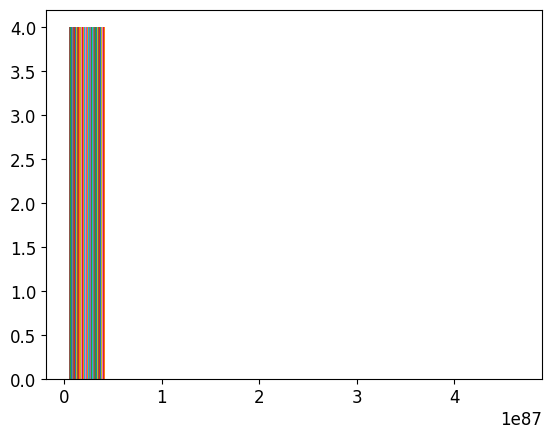

In [220]:
plt.hist(ng_log_lk)

In [221]:
posteriors = naive_gaussian_predict_proba(prior, mu, sigma2, star_embeddings_train)

C:\Users\phily\AppData\Local\Temp\ipykernel_28416\3566163773.py:77: RuntimeWarning: invalid value encountered in divide
  posteriors = np.exp(log_posterior)/normalize_term # <-- EDIT THIS LINE


In [225]:
y_classed = np.argmax(posteriors, axis=0)

In [226]:
#accuracy
print(np.mean(y_classed == star_classes_train))

0.2345679012345679


<a name="task-42"></a>


### **4.2 (5 marks, 3rd-year students only)**   [(index)](#index-task-42)


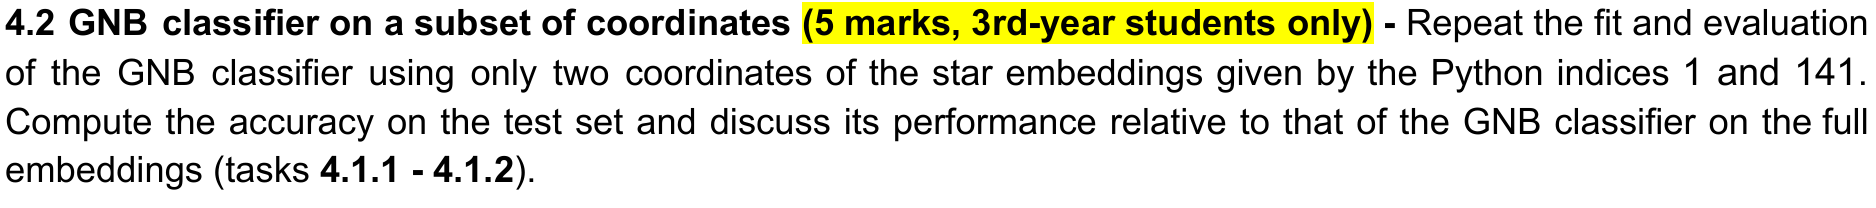

In [228]:
posteriors2 = naive_gaussian_predict_proba(prior, mu, sigma2, star_embeddings_train[:, [1, 141]])
y_classed2 = np.argmax(posteriors2, axis=0)

In [229]:
#accuracy2
print(np.mean(y_classed2 == star_classes_train))

0.18981481481481483


The accuracy on just the python indices 1 and 141 is worse than the one earlier, so its performance is worse

<a name="task-42m"></a>


### **4.2 (5 marks, MSc/4th-year students only)**   [(index)](#index-task-42m)

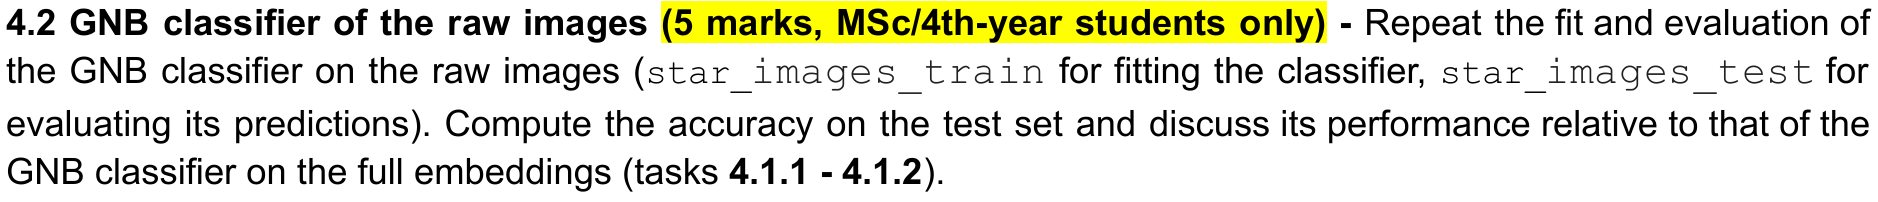



---



<a name="task-5"></a>

## Task 5:  Soft-margin linear Support Vector Machine (SVM) classifier (15 marks) [(index)](#index-task-5)

<a name="task-51"></a>

### **5.1 (10 marks)**   [(index)](#index-task-51)

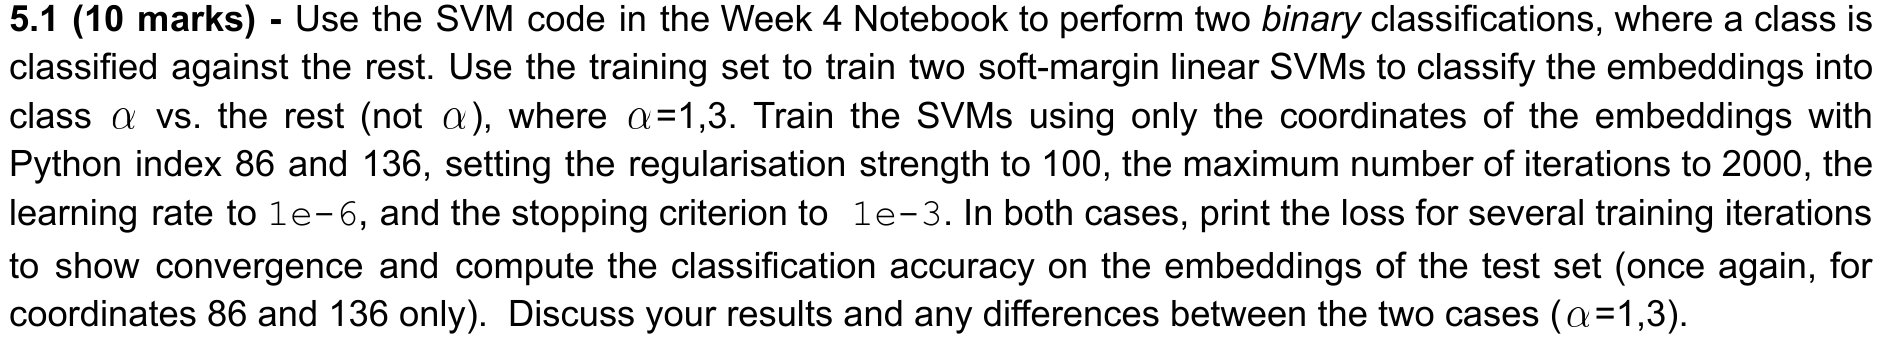

In [141]:
## EDIT THIS FUNCTION
def standardise(X):
  mu = np.mean(X, 0)
  sigma = np.std(X, 0)
  X_std = (X - mu) / sigma ## <-- SOLUTION
  return X_std

In [142]:
X_std = standardise(star_embeddings_train[:, [86, 136]])

In [143]:
print(X_std.shape)

(648, 2)


In [148]:
y_train1 = np.where(star_classes_train==1, 1, 0)

In [178]:
y_train2 = np.where(star_classes_train==3, 1, 0)

In [144]:
# EDIT THIS FUNCTION
def compute_cost(w, X, y, regul_strength=1e5):
  n = X.shape[0]
  distances = 1 - y * (X @ w)  ## <-- SOLUTION
  distances[distances < 0] = 0  # equivalent to max(0, distance)
  hinge = regul_strength * distances.mean() ## <-- SOLUTION

  # calculate cost
  return 0.5 * np.dot(w, w) + hinge - 0.5 * w[-1] ** 2

In [175]:
# calculate gradient of cost
def calculate_cost_gradient(w, X_batch, y_batch, regul_strength=1e6):
    # if only one example is passed
    if isinstance(y_batch, np.int32):
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])  # gives multidimensional array
    
    distance = 1 - (y_batch * (X_batch @ w))
    dw = np.zeros(len(w))
    
    we = w.copy() # So as not to overwrite w
    we[-1] = 0 # So as not to have b in its derivative when adding the weights in di
    
    for ind, d in enumerate(distance):
        if max(0, d)==0: ## <-- SOLUTION
            di = we ## <-- SOLUTION
        else:
            di = we - (regul_strength * y_batch[ind] * X_batch[ind]) ## <-- SOLUTION
        dw += di
    
    return dw/len(y_batch)  # average

In [176]:
# EDIT THIS FUNCTION
def sgd(X, y, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e6, print_outcome=False):

  # initialise zero weights
  weights = np.zeros(X.shape[1])
  nth = 0
  # initialise starting cost as infinity
  prev_cost = np.inf
  # record costs
  cost_list = []
  iteration_list = []

  # stochastic gradient descent
  indices = np.arange(len(y))

  for iteration in range(max_iterations):
    # shuffle to prevent repeating update cycles
    np.random.shuffle(indices)
    X, y = X[indices], y[indices]

    for xi, yi in zip(X, y):
      descent = calculate_cost_gradient(weights, xi, yi, regul_strength) ## <-- SOLUTION
      weights = weights - (learning_rate * descent) ## <-- SOLUTION

    # convergence check on 2^n'th iteration
    if iteration==2**nth or iteration==max_iterations-1:
      # compute cost
      cost = compute_cost(weights, X, y, regul_strength)  ## <-- SOLUTION
      if print_outcome:
        print("Iteration is: {}, Cost is: {}".format(iteration, cost))
      # stop criterion
      if abs(prev_cost - cost) < stop_criterion * prev_cost: ## <-- SOLUTION
        return weights, cost_list, iteration_list

      prev_cost = cost
      iteration_list.append(iteration)
      cost_list.append(cost)
      nth += 1

  return weights, cost_list, iteration_list

In [177]:
w, costs, iterations = sgd(X_std, y_train1, max_iterations=2000, stop_criterion=1e-3, learning_rate=1e-6, regul_strength=100, print_outcome=True)


Iteration is: 1, Cost is: 99.4354698372048
Iteration is: 2, Cost is: 99.15350101780668
Iteration is: 4, Cost is: 98.59015445739229
Iteration is: 8, Cost is: 97.46583972363447
Iteration is: 16, Cost is: 95.22658971444149
Iteration is: 32, Cost is: 90.7851703927347
Iteration is: 64, Cost is: 82.12692218208278
Iteration is: 128, Cost is: 75.34945528156435
Iteration is: 256, Cost is: 74.90213201147701
Iteration is: 512, Cost is: 74.84239403212446


In [179]:
w3, costs3, iterations3 = sgd(X_std, y_train2, max_iterations=2000, stop_criterion=1e-3, learning_rate=1e-6, regul_strength=100, print_outcome=True)

Iteration is: 1, Cost is: 95.94319045435991
Iteration is: 2, Cost is: 93.91672669471967
Iteration is: 4, Cost is: 89.8676915507937
Iteration is: 8, Cost is: 81.78489336307221
Iteration is: 16, Cost is: 76.81445747869192
Iteration is: 32, Cost is: 76.18801972102258
Iteration is: 64, Cost is: 75.97452056424306
Iteration is: 128, Cost is: 75.83614845501312
Iteration is: 256, Cost is: 75.77457020941989


In [184]:
def score(w, X, y):
  y_preds = np.sign(X @ w)
  return np.mean(y_preds == y) ## <-- SOLUTION


In [188]:
X_test = standardise(star_embeddings_test[:, [86, 136]])

In [189]:
print(X_test.shape)

(32, 2)


In [190]:
y_test1 = np.where(star_classes_test==1, 1, 0)
y_test2 = np.where(star_classes_test==3, 1, 0)

In [191]:

print("Accuracy on test set for alpha=1: {}".format(score(w, X_test, y_test1)))

Accuracy on test set for alpha=1: 0.25


In [193]:
print("Accuracy on test set for alpha=3: {}".format(score(w3, X_test, y_test2)))

Accuracy on test set for alpha=3: 0.21875


<a name="task-52"></a>

### **5.2 (5 marks, 3rd-year students only)**   [(index)](#index-task-52)


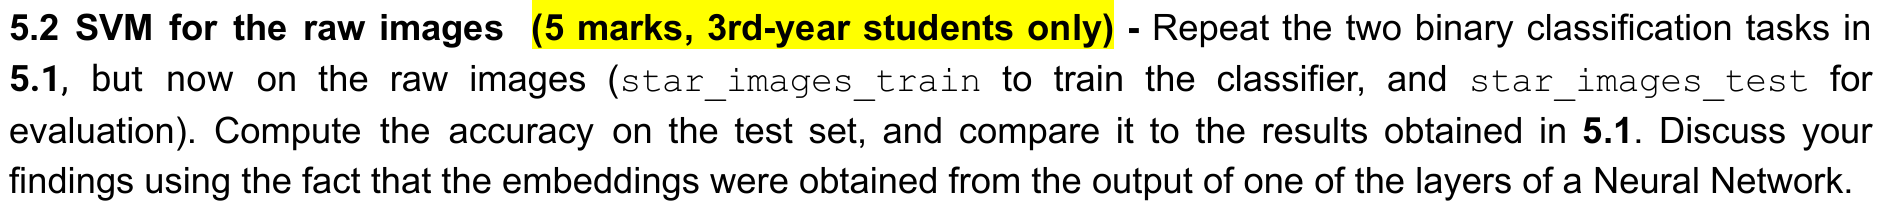

<a name="task-52m"></a>

### **5.2 (5 marks, MSc/4th-year students only)**   [(index)](#index-task-52m)

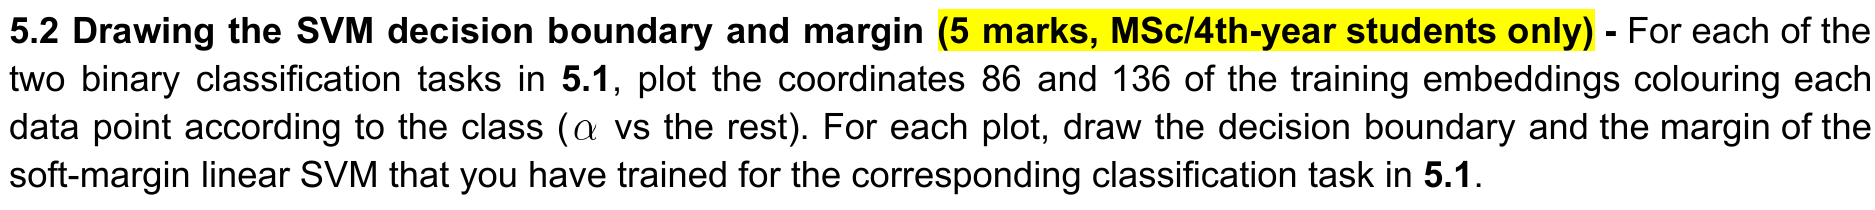